**Project Final Report**

**Authors: Student Number**

Mansehaj Randhawa: 23016405

Kiana Shahbazi:

Paniz Arbabi:

In [2]:
# Load Data
library(tidyverse)
library(readr)


player_url <- "https://raw.githubusercontent.com/mansehajrandhawa/Data-Science-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/mansehajrandhawa/Data-Science-Project/refs/heads/main/sessions.csv"

players  <- read_csv(player_url)
sessions <- read_csv(sessions_url)

head(players)
head(sessions)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.2
v tibble  3.2.1     v dplyr   1.1.4
v tidyr   1.3.1     v stringr 1.5.0
v readr   2.1.5     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 196 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

i Use `spec()` to retrieve the full column

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [10]:
players_wrangled  <- players
sessions_wrangled <- sessions

sessions_wrangled <- sessions_wrangled |>
  mutate(
    # parse start and end times as POSIXct
    start_time_posix = as.POSIXct(start_time,
                                  format = "%d/%m/%Y %H:%M",
                                  tz = "UTC"),
    end_time_posix   = as.POSIXct(end_time,
                                  format = "%d/%m/%Y %H:%M",
                                  tz = "UTC"),
    # fields we actually want for the forecasting question
    date    = as.Date(start_time_posix),
    hour    = as.numeric(format(start_time_posix, "%H")),
    weekday = weekdays(date)
  )

sessions_wrangled |>
  select(hashedEmail, start_time_posix, end_time_posix,
         date, hour, weekday) |>
  head()

hashedEmail,start_time_posix,end_time_posix,date,hour,weekday
<chr>,<dttm>,<dttm>,<date>,<dbl>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,2024-06-30,18,Sunday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,2024-06-17,23,Monday
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,2024-07-25,17,Thursday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,2024-07-25,3,Thursday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,2024-05-25,16,Saturday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,2024-06-23,15,Sunday


In [11]:
hourly_players <- sessions_wrangled |>
  group_by(date, hour, weekday) |>
  summarise(
    unique_players = n_distinct(hashedEmail),
    .groups = "drop"
  )

head(hourly_players)

date,hour,weekday,unique_players
<date>,<dbl>,<chr>,<int>
2024-04-06,9,Saturday,1
2024-04-06,20,Saturday,1
2024-04-06,22,Saturday,1
2024-04-07,0,Sunday,1
2024-04-07,2,Sunday,1
2024-04-07,5,Sunday,2


In [12]:
hourly_summary <- hourly_players |>
  summarise(
    min_players    = min(unique_players,    na.rm = TRUE),
    mean_players   = mean(unique_players,   na.rm = TRUE),
    median_players = median(unique_players, na.rm = TRUE),
    max_players    = max(unique_players,    na.rm = TRUE)
  )

hourly_summary

min_players,mean_players,median_players,max_players
<int>,<dbl>,<dbl>,<int>
1,1.451477,1,6


hour,mean_players
<dbl>,<dbl>
0,1.600000
1,1.288136
2,1.737500
3,1.684932
4,1.578313
5,1.355932
6,1.333333
7,1.366667
8,1.000000


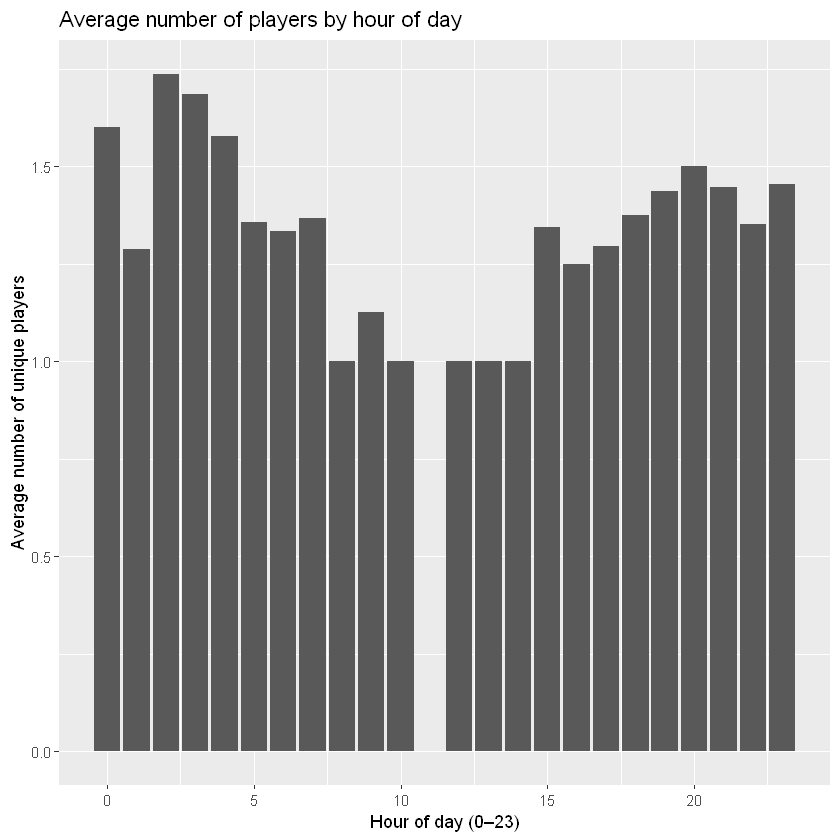

In [13]:
players_by_hour <- hourly_players |>
  group_by(hour) |>
  summarise(
    mean_players = mean(unique_players, na.rm = TRUE),
    .groups = "drop"
  )

players_by_hour

ggplot(players_by_hour,
       aes(x = hour,
           y = mean_players)) +
  geom_col() +
  labs(
    title = "Average number of players by hour of day",
    x = "Hour of day (0–23)",
    y = "Average number of unique players"
  )

weekday,mean_players
<chr>,<dbl>
Friday,1.369565
Monday,1.389262
Saturday,1.387597
Sunday,1.489510
Thursday,1.458904
Tuesday,1.517986
Wednesday,1.576923


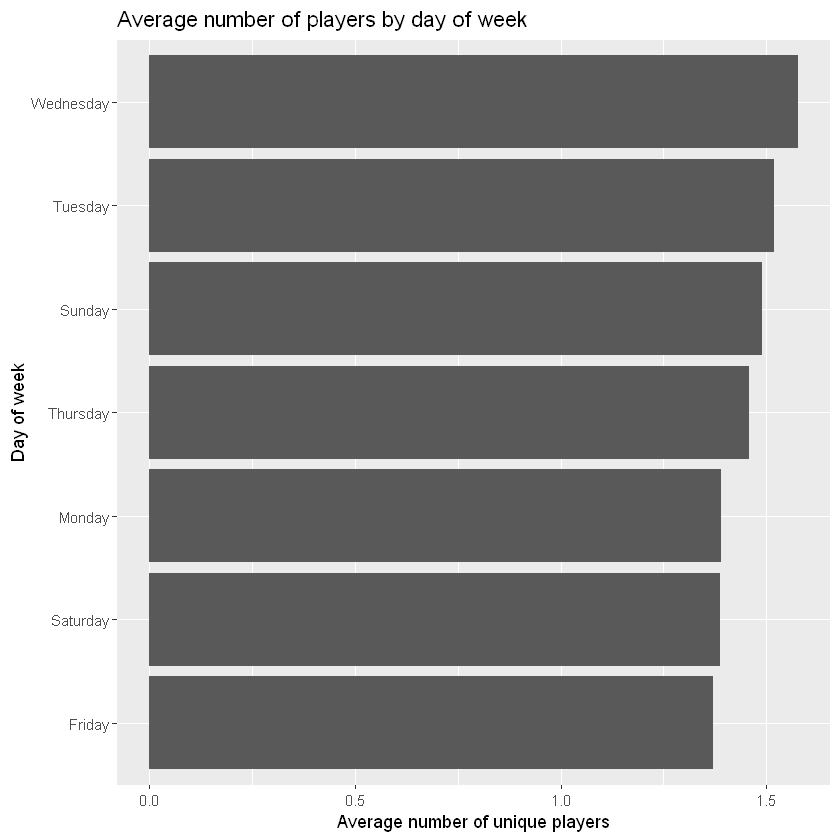

In [8]:
players_by_weekday <- hourly_players |>
  group_by(weekday) |>
  summarise(
    mean_players = mean(unique_players, na.rm = TRUE),
    .groups = "drop"
  )

players_by_weekday

ggplot(players_by_weekday,
       aes(x = reorder(weekday, mean_players),
           y = mean_players)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Average number of players by day of week",
    x = "Day of week",
    y = "Average number of unique players"
  )

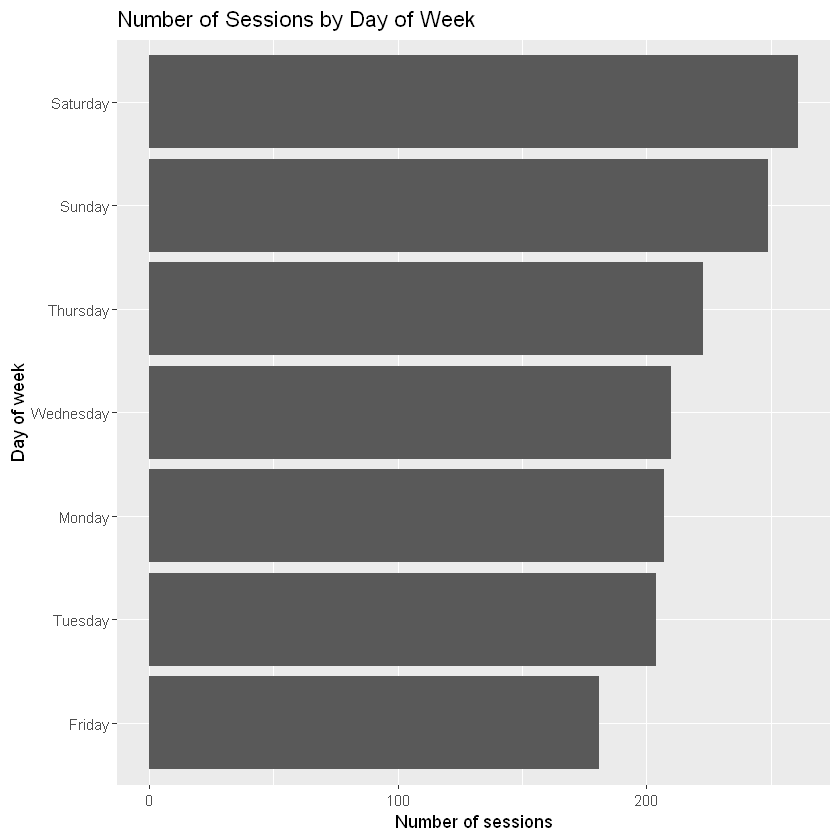

In [14]:
sessions_by_weekday <- sessions_wrangled |>
  group_by(weekday) |>
  summarise(number_of_sessions = n())

ggplot(sessions_by_weekday,
       aes(x = reorder(weekday, number_of_sessions),
           y = number_of_sessions)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Number of Sessions by Day of Week",
    x = "Day of week",
    y = "Number of sessions"
  )


**References (Bibliography)**

Jones, Megan A. , et al. “Time Series 02: Dealing with Dates & Times in R - As.Date, POSIXct, POSIXlt | NSF NEON | Open Data to Understand Our Ecosystems.” Www.neonscience.org, 13 May 2021, www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r.